In [31]:
import numpy as np
from graphviz import Digraph
from typing import List,Tuple
import matplotlib.pyplot as plt
from itertools import chain
import scipy.special as scs


In [2]:
def getEdgeString(s11,s12,l,s21,s22,maxval):
    if s21 == s22 and s21 != 0 and s21 != maxval:
        return '"{s11},{s12}":s->"{s21},{s22}"[label={l},color="red"]'.format(s11=s11, s12=s12, l=l, s21=s21, s22=s22)
    else:
        return '"{s11},{s12}":s->"{s21},{s22}"[label={l}]'.format(s11=s11, s12=s12, l=l, s21=s21, s22=s22)

def getEdges(s1, s2, maxval, depth):
    output = []
    nodes = []
    # print("depth",depth,s1,s2)
    if s1!=15:
        if s1+3 <= maxval and s1+3 != s2 and s1 % 4 == 0:
            output.append(getEdgeString(s1, s2, 3,s1+3,s2, maxval))
            output.extend(getEdges(s1+3, s2, maxval, depth+1))
        if s1+4 <= maxval and s1+4 != s2:
            output.append(getEdgeString(s1, s2, 4,s1+4,s2, maxval))
            output.extend(getEdges(s1+4, s2, maxval, depth+1))
    else:
        if s2+3 <= maxval and s2+3 != s1 and s2 % 4 == 0:
            output.append(getEdgeString(s1, s2, 3,s1,s2+3, maxval))
            output.extend(getEdges(s1, s2+3, maxval, depth+1))
        if s2+4 <= maxval and s2+4 != s1:
            output.append(getEdgeString(s1, s2, 4,s1,s2+4, maxval))
            output.extend(getEdges(s1, s2+4, maxval, depth+1))

    return output


print("\n".join(np.unique(getEdges(0, 0, 15, 0))))


"0,0":s->"3,0"[label=3]
"0,0":s->"4,0"[label=4]
"11,0":s->"15,0"[label=4]
"12,0":s->"15,0"[label=3]
"15,0":s->"15,3"[label=3]
"15,0":s->"15,4"[label=4]
"15,3":s->"15,7"[label=4]
"15,4":s->"15,7"[label=3]
"15,4":s->"15,8"[label=4]
"15,7":s->"15,11"[label=4]
"15,8":s->"15,11"[label=3]
"15,8":s->"15,12"[label=4]
"3,0":s->"7,0"[label=4]
"4,0":s->"7,0"[label=3]
"4,0":s->"8,0"[label=4]
"7,0":s->"11,0"[label=4]
"8,0":s->"11,0"[label=3]
"8,0":s->"12,0"[label=4]


In [3]:
def getNodes(s1, s2, maxval, depth):
    output = []
    nodes = []
    # print("depth",depth,s1,s2)
    if s1+3 <= maxval and s1+3 != s2 and s1 % 4 == 0:
        output.extend(getNodes(s1+3, s2, maxval, depth+1))
    if s1+4 <= maxval and s1+4 != s2:
        output.extend(getNodes(s1+4, s2, maxval, depth+1))

    if s2+3 <= maxval and s2+3 != s1 and s2 % 4 == 0:
        output.extend(getNodes(s1, s2+3, maxval, depth+1))
    if s2+4 <= maxval and s2+3 != s1:
        output.extend(getNodes(s1, s2+4, maxval, depth+1))

    if s1 <= maxval and s2 <= maxval:
        if s1 != s2 or (s1==s2==0 or s1==s2==maxval) :
            output.append(
                '"{s1},{s2}"[label="{s1}|{s2}",color="black"]'.format(s1=s1, s2=s2))
    return output


# print("\n".join(np.unique(getNodes(0, 0, 15, 0))))
# np.unique(getNodes(0, 0, 15, 0))
# dot.edges(['"0,0": s -> "3,0"[label=3]'])


[720 400]


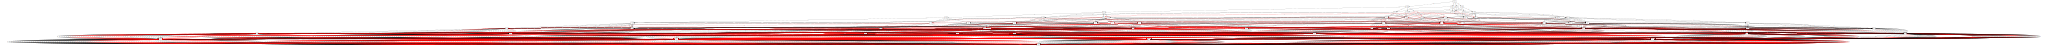

In [4]:
def getNodesgraph(g:Digraph,s1, s2, maxval, depth):
    # print("depth",depth,s1,s2)
    if s1+3 <= maxval and s1+3 != s2 and s1 % 4 == 0:
        getNodesgraph(g,s1+3, s2, maxval, depth+1)
    if s1+4 <= maxval and s1+4 != s2:
        getNodesgraph(g,s1+4, s2, maxval, depth+1)

    if s2+3 <= maxval and s2+3 != s1 and s2 % 4 == 0:
        getNodesgraph(g,s1, s2+3, maxval, depth+1)
    if s2+4 <= maxval and s2+3 != s1:
        getNodesgraph(g,s1, s2+4, maxval, depth+1)

    if s1 <= maxval and s2 <= maxval:
        if s1 != s2 or (s1 == s2 == 0 or s1 == s2 == maxval):
            g.node('"{s1},{s2}"'.format(s1=s1, s2=s2),
                   '{s1}|{s2}'.format(s1=s1, s2=s2), )



def makeEdge(g:Digraph,stateTail,stateHead,dist,color="black"):
    # print("form", stateTail, " to", stateHead)
    # if color=="black":
        # return
    tail_formated = '"{}"'.format(",".join([str(x) for x in stateTail]))
    head_formated = '"{}"'.format(",".join([str(x) for x in stateHead]))
    g.edge(tail_formated,head_formated,label=str(dist),color=color)

def makeNode(g:Digraph,state,color="black"):
    name = '"{}"'.format(",".join([str(x) for x in state]))

    label = '{}'.format('|'.join([str(x) for x in state]))
    g.node(name,label,color=color)

moves=[3,4]
def getEdgesGraph(g:Digraph,startstate:List[int], maxval, depth,color="black"):
    oldcolor=color
    leaf=True
    output = np.asarray([0, 0])
    for move in moves:
        for i,pos in enumerate(startstate):
            # if pos+move <= maxval and all([pos+move != pos2 or pos2==maxval for pos2 in startstate[:i]+startstate[i+1:]]) and (move ==4 or pos % 4 == 0):
            #     makeEdge(g, startstate[:i]+[pos]+startstate[i+1:],
            #              startstate[:i]+[pos+move]+startstate[i+1:], move)
            #     getEdgesGraph(
            #         g, startstate[:i]+[pos+move]+startstate[i+1:], maxval, depth+1)
            if pos+move <= maxval and (move == 4 or pos % 4 == 0):
                if any([pos1 == pos and pos != 0 and startstate[0] != maxval for pos1 in startstate[:i]+startstate[i+1:]]):
                    color="red"
                makeEdge(g, startstate,
                             startstate[:i]+[pos+move]+startstate[i+1:], move, color)
                
                output+=getEdgesGraph(
                    g, startstate[:i]+[pos+move]+startstate[i+1:], maxval, depth+1, color)
                leaf=False


    if all([pos <= maxval for pos in startstate]):
        if all([[(pos != pos2 or any([v1 == v for v in [maxval, 0]for v1 in [pos, pos2]]) or pos2 == maxval or pos, pos, pos2) for pos in startstate[:i]+startstate[i+1:]] for i, pos2 in enumerate(startstate)]):
            makeNode(g,startstate, "black")
        if all([startstate[0] == pos and startstate[0] != 0 and startstate[0]!= maxval for pos in startstate]):
            makeNode(g,startstate, "red")
    if leaf:
        if color=="red":
            return [1,0]
        else:
            return [0,1]

    return output


def getGraph(maxval: int, stonescount: int):
    dot = Digraph(node_attr={"shape": "record"})
    # getNodesgraph(dot, 0, 0, maxval, 0)
    pathCount = getEdgesGraph(dot, [0]*stonescount, maxval, 0)
    print(pathCount)

    return dot


getGraph(15,2)


In [29]:
def getCounts(startstate:List[int], maxval, depth,color="black"):
    output = np.asarray([0, 0])
    leaf=True
    for move in moves:
        for i,pos in enumerate(startstate):
            if pos+move <= maxval and (move == 4 or pos % 4 == 0):
                if any([pos1 == pos and pos != 0 and startstate[0] != maxval for pos1 in startstate[:i]+startstate[i+1:]]):
                    output += getCounts(startstate[:i]+[pos+move]+startstate[i+1:], maxval, depth+1, "red")
                else:
                    output += getCounts(startstate[:i]+[pos+move] + startstate[i+1:], maxval, depth+1,color)
                leaf=False

    if leaf:
        if color=="red":
            return [0,1]
        else:
            return [1,0]

    return output


def getGraph(maxval: int, stonescount: int):
    pathCount = getCounts([0]*stonescount, maxval, 0)
    print(pathCount, sum(pathCount))




# getGraph(15, 1) -> [4 0] 4
# getGraph(15,2) -> [400 720] 1120
# getGraph(15,3) -> [ 165392 2052208] 2217600
getGraph(15,2)


[400 720] 1120


In [28]:
moves=[3,4]
def _getGraphPath(startstate: Tuple[int], maxval, depth, color="black", passedNodes=[] ):
    leaf = True
    output = np.asarray([0, 0])
    path = []
    path_red = []
    for move in moves:
        for i, pos in enumerate(startstate):
           
            if pos+move <= maxval and (move == 4 or pos % 4 == 0):
                nextState = startstate[:i]+tuple([pos+move])+startstate[i+1:]
                if any([pos1 == pos and pos != 0 and pos != maxval for pos1 in startstate[:i]+startstate[i+1:]]):
                    color = "red"
                _output,  p,pr = _getGraphPath(
                    nextState, maxval, depth+1, color, [*passedNodes,startstate])
                output+=_output
                path.extend(p)
                path_red.extend(pr)
                leaf = False
    if leaf:
        if color == "red":
            output= [ 0,1]
            path_red = [passedNodes+[startstate]]
        else:
            output = [ 1,0]
            # print(passedNodes)
            path = [passedNodes+[startstate]]

    return output,  path,path_red


def getGraphPath(maxval: int, stonescount: int):
    d={}
    pathCount ,path,path_red = _getGraphPath(tuple([0]*stonescount), maxval, 0)
    print(pathCount,sum(pathCount))
    # print(d)
    return path,path_red


p,pr = getGraphPath(15, 2)

len(np.unique(p,axis=0)),len(np.unique(pr,axis=0))

[400 720] 1120


(400, 720)

In [7]:
p[0]

[(0,), (3,), (7,), (11,), (15,)]

3
[[3, 4, 4, 4], [3, 4, 4, 4], [3, 4, 4, 4]]
[  174 34476] 34650


array([[ 0,  3,  7,  7, 11, 11, 11, 15, 15, 15, 15, 15, 15],
       [ 0,  0,  0,  3,  3,  7,  7,  7, 11, 15, 15, 15, 15],
       [ 0,  0,  0,  0,  0,  0,  3,  3,  3,  3,  7, 11, 15]])

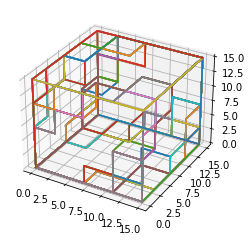

In [30]:
def _getGraphPath(startstate: Tuple[int], maxval, depth=0, pos_moves=[[4, 4, 4, 3]]*2, color="black", passedNodes=[]):
    # print(pos_moves)
    leaf = True
    output = np.asarray([0, 0])
    path = []
    path_red = []
    for move in [3,4]:
        for i, pos in enumerate(startstate):
           
            if pos+move <= maxval and (move == pos_moves[i][0]):
                if len(pos_moves[i]):
                    # print(pos_moves[i][1:])
                    new_pos_moves=pos_moves[:i]+[pos_moves[i][1:]] +pos_moves[i+1:]
                    # print(new_pos_moves)
                else:
                    new_pos_moves=pos_moves[:i]+[] +pos_moves[i+1:]

                nextState = startstate[:i]+tuple([pos+move])+startstate[i+1:]
                if any([pos1 == pos and pos != 0 and pos != maxval for pos1 in startstate[:i]+startstate[i+1:]]):
                    _output,  p,pr = _getGraphPath(
                    nextState, maxval, depth+1,new_pos_moves, "red", [*passedNodes,startstate])
                else:
                    _output,  p,pr = _getGraphPath(
                    nextState, maxval, depth+1,new_pos_moves, color, [*passedNodes,startstate])
                output+=_output
                path.extend(p)
                path_red.extend(pr)
                leaf = False
    if leaf:
        if color == "red":
            output= [ 0,1]
            path_red = [passedNodes+[startstate]]
        else:
            output = [ 1,0]
            # print(passedNodes)
            path = [passedNodes+[startstate]]

    return output,  path,path_red


def getGraphPath(maxval: int, stonescount: int, pos_moves):
    print(stonescount)
    print(pos_moves)
    pathCount ,path,path_red = _getGraphPath(tuple([0]*stonescount), maxval,pos_moves=pos_moves)
    print(pathCount,sum(pathCount))
    # print(d)
    return path,path_red


moves = [[3, 4, 4, 4], [3, 4, 4, 4], [3, 4, 4, 4]]
p, pr = getGraphPath(15, len(moves), moves)
# p
np.asarray(p[0]).T
ax = plt.figure().add_subplot(projection='3d')
for n in p:
    ax.plot(*np.asarray(n).T)
np.asarray(p[5]).T


In [18]:
anz_Steine=3
def moeglPos4Stone(anz_Steine):
    anz_positionen_f_stein = 7 # 3,4,7,8,11,12,15
    return (1+4*(anz_Steine-1))*anz_positionen_f_stein
[moeglPos4Stone(i)**(i-1) for i in [1,2,3,4]]
# getGraph(15, 1) -> [4 0] 4
# getGraph(15,2) -> [400 720] 1120
# getGraph(15,3) -> [ 165392 2052208] 2217600
w =4 # mögliche Wege
x = 3 #anzahlSteine
[w**x for x in [1,2,3]]
# 2217600/64

[4, 16, 64]

In [36]:
scs.binom(2, 1)*scs.binom(6, 3)*2+scs.binom(4, 2)*scs.binom(4, 2)*2

720/152

4.7368421052631575

In [27]:
len(p)/((2**7)*3*13)


def faktorisiere(n):
    l = []  # Lösungsmenge
    # Auf Teilbarkeit durch 2, und alle ungeraden Zahlen von 3..n/2 testen
    for i in chain([2], range(3, n//2 + 1, 2)):
        # Ein Teiler kann mehrfach vorkommen (z.B. 4 = 2 * 2), deswegen:
        while n % i == 0:
            l.append(i)
            n = n // i  # "//" ist ganzzahlige Division und entspricht int(n/i)
        if i > n:  # Alle Teiler gefunden? Dann Abbruch.
            break
    return l


# 2217600/1120
faktorisiere(2217600//(9*4**3)), faktorisiere(1120//(5*4**2)), faktorisiere(4//(1*4**1))
faktorisiere(2217600//(1120*4)), faktorisiere(1120 // (4*4)), faktorisiere(4//(4))
1120/70

16.0

NameError: name 'd' is not defined

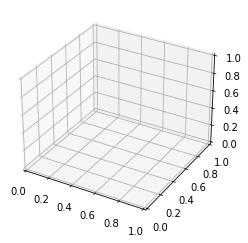

In [12]:
ax = plt.figure().add_subplot(projection='3d')
for n in d["nodes"].values():
    ax.plot(n["state"][0], n["state"][1], n["state"][2], marker="s")
for n in d["edges"].values():
    x = [n["src"][0], n["dest"][0]]
    y = [n["src"][1], n["dest"][1]]
    z = [n["src"][2], n["dest"][2]]
    # print(x)
    ax.plot(x, y, z, color=n["color"])

d = getGraphDict(15, 1)
ax = plt.figure().add_subplot()
for n in d["nodes"].values():
    ax.plot(n["state"][0], n["state"][1], marker="s")
for n in d["edges"].values():
    x = [n["src"][0], n["dest"][0]]
    y = [n["src"][1], n["dest"][1]]
    ax.plot(x, y, color=n["color"])


In [ ]:
startstate = tuple([0]*5)
maxval=1
for i, pos in enumerate(startstate):
    print(i,pos,any([pos1 == pos and pos != 0 and pos !=
        maxval for pos1 in startstate[:i]+startstate[i+1:]]))
tuple([4])

0 0 False
1 0 False
2 0 False
3 0 False
4 0 False


(4,)